### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [54]:
loja4.tail()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
2353,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
2354,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
2355,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4
2357,Corda de pular,esporte e lazer,14.89,1.732696,17/11/2021,Felipe Santos,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4


#1. Análise do faturamento



In [3]:
sum(loja['Preço'])

1534509.12

In [4]:
sum(loja2['Preço'])

1488459.06

In [5]:
sum(loja3['Preço'])

1464025.03

In [6]:
sum(loja4['Preço'])

1384497.58

Resumo:

In [49]:
faturamento = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [loja['Preço'].sum(), loja2['Preço'].sum(),
                    loja3['Preço'].sum(), loja4['Preço'].sum()]
})
faturamento

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


# 2. Vendas por Categoria

## 2.1 Vendas por categoria



In [8]:
vendas_por_categoria_loja = loja.groupby(['Categoria do Produto']).size().reset_index(name='quantidade_vendas')
vendas_por_categoria_loja

,Categoria do Produto,quantidade_vendas
0,brinquedos,324
1,eletrodomesticos,312
2,eletronicos,448
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
6,moveis,465
7,utilidades domesticas,171


In [9]:
vendas_por_categoria_loja2 = loja2.groupby(['Categoria do Produto']).size().reset_index(name='quantidade_vendas')
vendas_por_categoria_loja2

,Categoria do Produto,quantidade_vendas
0,brinquedos,313
1,eletrodomesticos,305
2,eletronicos,422
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
6,moveis,442
7,utilidades domesticas,181


In [10]:
vendas_por_categoria_loja3 = loja3.groupby(['Categoria do Produto']).size().reset_index(name='quantidade_vendas')
vendas_por_categoria_loja3

,Categoria do Produto,quantidade_vendas
0,brinquedos,315
1,eletrodomesticos,278
2,eletronicos,451
3,esporte e lazer,277
4,instrumentos musicais,177
5,livros,185
6,moveis,499
7,utilidades domesticas,177


In [11]:
vendas_por_categoria_loja4 = loja4.groupby(['Categoria do Produto']).size().reset_index(name='quantidade_vendas')
vendas_por_categoria_loja4

,Categoria do Produto,quantidade_vendas
0,brinquedos,338
1,eletrodomesticos,254
2,eletronicos,451
3,esporte e lazer,277
4,instrumentos musicais,170
5,livros,187
6,moveis,480
7,utilidades domesticas,201


## 2.2 Categorias mais populares:

In [12]:
vendas_por_categoria_loja.sort_values(['quantidade_vendas'], ascending=False).head(3)

,Categoria do Produto,quantidade_vendas
6,moveis,465
2,eletronicos,448
0,brinquedos,324


In [13]:
vendas_por_categoria_loja2.sort_values(['quantidade_vendas'], ascending=False).head(3)

,Categoria do Produto,quantidade_vendas
6,moveis,442
2,eletronicos,422
0,brinquedos,313


In [14]:
vendas_por_categoria_loja3.sort_values(['quantidade_vendas'], ascending=False).head(3)

,Categoria do Produto,quantidade_vendas
6,moveis,499
2,eletronicos,451
0,brinquedos,315


In [15]:
vendas_por_categoria_loja4.sort_values(['quantidade_vendas'], ascending=False).head(3)

,Categoria do Produto,quantidade_vendas
6,moveis,480
2,eletronicos,451
0,brinquedos,338


## 2.3 Número de vendas totais:




In [58]:
quantidade = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Quantidade de Vendas': [len(loja), len(loja2), len(loja3), len(loja4)]
})

quantidade

,Loja,Quantidade de Vendas
0,Loja 1,2359
1,Loja 2,2359
2,Loja 3,2359
3,Loja 4,2358


# 3. Média de Avaliação das Lojas


In [16]:
loja['Avaliação da compra'].mean().round(2)

np.float64(3.98)

In [17]:
loja2['Avaliação da compra'].mean().round(2)

np.float64(4.04)

In [18]:
loja3['Avaliação da compra'].mean().round(2)

np.float64(4.05)

In [19]:
loja4['Avaliação da compra'].mean().round(2)

np.float64(4.0)

Resumo:

In [63]:
import pandas as pd

avaliacao = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Avaliação Média': [
        loja['Avaliação da compra'].mean().round(2),
        loja2['Avaliação da compra'].mean().round(2),
        loja3['Avaliação da compra'].mean().round(2),
        loja4['Avaliação da compra'].mean().round(2)
    ]
})

avaliacao


,Loja,Avaliação Média
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


# 4. Produtos Mais e Menos Vendidos

## 4.1 Vendas de produtos por loja

In [20]:
vendas_produtos_loja = loja.groupby(['Produto']).size().reset_index(name='quantidade_vendas')
vendas_produtos_loja

,Produto,quantidade_vendas
0,Assistente virtual,40
1,Bateria,53
2,Bicicleta,54
3,Blocos de montar,56
4,Bola de basquete,55
5,Bola de vôlei,42
6,Boneca bebê,40
7,Cadeira de escritório,46
8,Cama box,44
9,Cama king,44


In [21]:
vendas_produtos_loja2 = loja2.groupby(['Produto']).size().reset_index(name='quantidade_vendas')
vendas_produtos_loja2

,Produto,quantidade_vendas
0,Assistente virtual,38
1,Bateria,61
2,Bicicleta,45
3,Blocos de montar,54
4,Bola de basquete,42
5,Bola de vôlei,46
6,Boneca bebê,48
7,Cadeira de escritório,49
8,Cama box,47
9,Cama king,45


In [22]:
vendas_produtos_loja3 = loja3.groupby(['Produto']).size().reset_index(name='quantidade_vendas')
vendas_produtos_loja3

,Produto,quantidade_vendas
0,Assistente virtual,39
1,Bateria,41
2,Bicicleta,52
3,Blocos de montar,35
4,Bola de basquete,50
5,Bola de vôlei,48
6,Boneca bebê,39
7,Cadeira de escritório,46
8,Cama box,46
9,Cama king,56


In [23]:
vendas_produtos_loja4 = loja4.groupby(['Produto']).size().reset_index(name='quantidade_vendas')
vendas_produtos_loja4

,Produto,quantidade_vendas
0,Assistente virtual,50
1,Bateria,48
2,Bicicleta,45
3,Blocos de montar,54
4,Bola de basquete,50
5,Bola de vôlei,48
6,Boneca bebê,48
7,Cadeira de escritório,40
8,Cama box,62
9,Cama king,56


## 4.2 Produtos mais vendidos por loja




In [24]:
mais_vendidos_loja = vendas_produtos_loja.sort_values(['quantidade_vendas'], ascending=False).head(5)
mais_vendidos_loja

,Produto,quantidade_vendas
47,TV Led UHD 4K,60
37,Micro-ondas,60
24,Guarda roupas,60
43,Secadora de roupas,58
3,Blocos de montar,56


In [25]:
mais_vendidos_loja2 = vendas_produtos_loja2.sort_values(['quantidade_vendas'], ascending=False).head(5)
mais_vendidos_loja2

,Produto,quantidade_vendas
28,Iniciando em programação,65
37,Micro-ondas,62
1,Bateria,61
49,Violão,58
40,Pandeiro,58


In [26]:
mais_vendidos_loja3 = vendas_produtos_loja3.sort_values(['quantidade_vendas'], ascending=False).head(5)
mais_vendidos_loja3

,Produto,quantidade_vendas
32,Kit banquetas,57
36,Mesa de jantar,56
9,Cama king,56
17,Cômoda,55
30,Jogo de panelas,55


In [27]:
mais_vendidos_loja4 = vendas_produtos_loja4.sort_values(['quantidade_vendas'], ascending=False).head(5)
mais_vendidos_loja4

,Produto,quantidade_vendas
8,Cama box,62
20,Faqueiro,59
9,Cama king,56
18,Dashboards com Power BI,56
17,Cômoda,55


## 4.3 Produtos menos vendidos por loja


In [28]:
menos_vendidos_loja = vendas_produtos_loja.sort_values(['quantidade_vendas'], ascending=True).head(5)
menos_vendidos_loja

,Produto,quantidade_vendas
11,Celular ABXY,33
26,Headset,33
41,Panela de pressão,35
40,Pandeiro,36
13,Ciência de dados com python,39


In [29]:
menos_vendidos_loja2 = vendas_produtos_loja2.sort_values(['quantidade_vendas'], ascending=True).head(5)
menos_vendidos_loja2

,Produto,quantidade_vendas
31,Jogo de tabuleiro,32
27,Impressora,34
36,Mesa de jantar,34
42,Poltrona,35
22,Fone de ouvido,37


In [30]:
menos_vendidos_loja3 = vendas_produtos_loja3.sort_values(['quantidade_vendas'], ascending=True).head(5)
menos_vendidos_loja3

,Produto,quantidade_vendas
3,Blocos de montar,35
29,Jogo de copos,36
37,Micro-ondas,36
38,Mochila,36
25,Guitarra,38


In [31]:
menos_vendidos_loja4 = vendas_produtos_loja4.sort_values(['quantidade_vendas'], ascending=True).head(5)
menos_vendidos_loja4

,Produto,quantidade_vendas
25,Guitarra,33
24,Guarda roupas,34
49,Violão,37
13,Ciência de dados com python,38
34,Lavadora de roupas,38



##
---



# 5. Frete Médio por Loja

## 5.1 Média por local da compra

In [32]:
loja.groupby('Local da compra')['Frete'].mean().round(2)

,Frete
Local da compra,
AC,123.84
AL,38.84
AM,25.02
AP,16.49
BA,31.61
CE,30.12
DF,30.17
ES,25.96
GO,53.51


In [33]:
loja2.groupby('Local da compra')['Frete'].mean().round(2)

,Frete
Local da compra,
AC,3.44
AL,17.97
AM,18.74
BA,24.88
CE,24.83
DF,21.57
ES,25.13
GO,35.10
MA,38.00


In [34]:
loja3.groupby('Local da compra')['Frete'].mean().round(2)

,Frete
Local da compra,
AC,20.81
AL,65.20
AM,61.23
AP,10.84
BA,33.94
CE,20.06
DF,43.55
ES,44.64
GO,40.14


In [35]:
loja4.groupby('Local da compra')['Frete'].mean().round(2)

,Frete
Local da compra,
AL,15.16
AM,19.35
AP,35.72
BA,30.69
CE,26.73
DF,27.89
ES,30.76
GO,16.45
MA,45.66


## 5.2 Média total por loja

In [36]:
loja['Frete'].mean().round(2)

np.float64(34.69)

In [37]:
loja2['Frete'].mean().round(2)

np.float64(33.62)

In [38]:
loja3['Frete'].mean().round(2)

np.float64(33.07)

In [39]:
loja4['Frete'].mean().round(2)

np.float64(31.28)

Resumo:

In [40]:
fretes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [
        loja['Frete'].mean().round(2),
        loja2['Frete'].mean().round(2),
        loja3['Frete'].mean().round(2),
        loja4['Frete'].mean().round(2)
    ]
})

fretes


,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


# 6. Gráficos

In [41]:
import matplotlib.pyplot as plt

## Gráfico 1: Faturamento total por loja

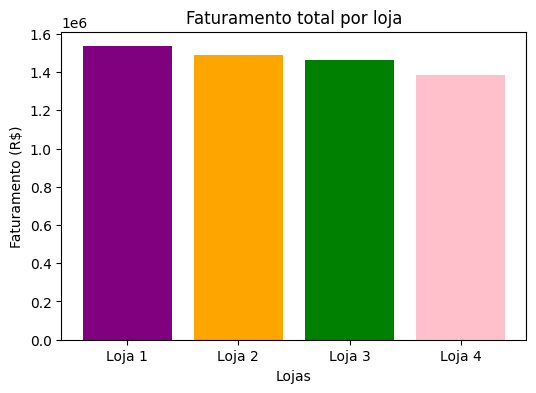

In [42]:
faturamento = [
    loja['Preço'].sum(),
    loja2['Preço'].sum(),
    loja3['Preço'].sum(),
    loja4['Preço'].sum()
]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(6,4))
plt.bar(lojas, faturamento, color=['purple','orange','green','pink'])
plt.title('Faturamento total por loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.show()

## Gráfico 2: Frete médio por loja

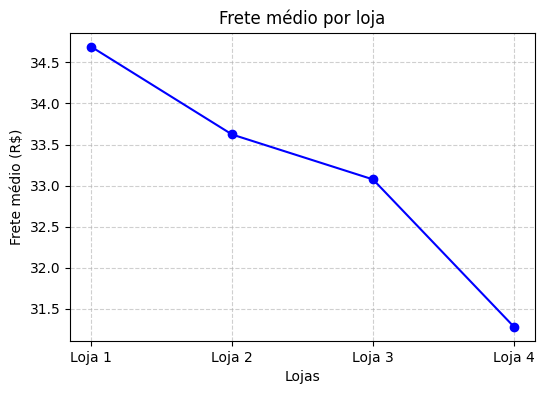

In [43]:
frete_medio = [
    loja['Frete'].mean(),
    loja2['Frete'].mean(),
    loja3['Frete'].mean(),
    loja4['Frete'].mean()
]

plt.figure(figsize=(6,4))
plt.plot(lojas, frete_medio, marker='o', color='blue')
plt.title('Frete médio por loja')
plt.xlabel('Lojas')
plt.ylabel('Frete médio (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Gráfico 3: Distribuição das categorias de produtos




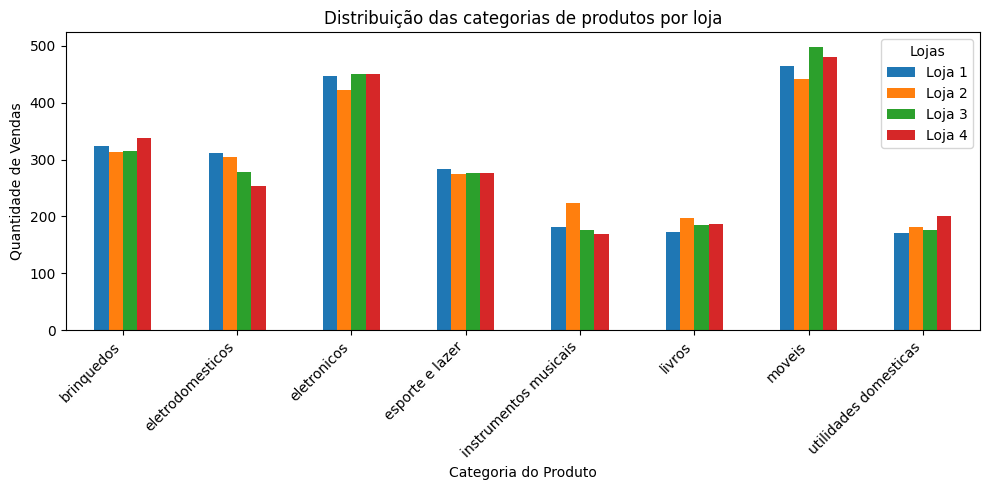

In [44]:
# Cria coluna 'Loja' e junta todas
loja1 = loja.assign(Loja='Loja 1')
loja2 = loja2.assign(Loja='Loja 2')
loja3 = loja3.assign(Loja='Loja 3')
loja4 = loja4.assign(Loja='Loja 4')
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Conta quantas vendas tem por categoria em cada loja
vendas_categoria = todas_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='quantidade')

# Coloca no formato de tabela para o gráfico
vendas_pivot = vendas_categoria.pivot(index='Categoria do Produto', columns='Loja', values='quantidade')

# Cria o gráfico
vendas_pivot.plot(kind='bar', figsize=(10,5))
plt.title('Distribuição das categorias de produtos por loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Lojas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Gráfico 4: Produtos mais vendidos




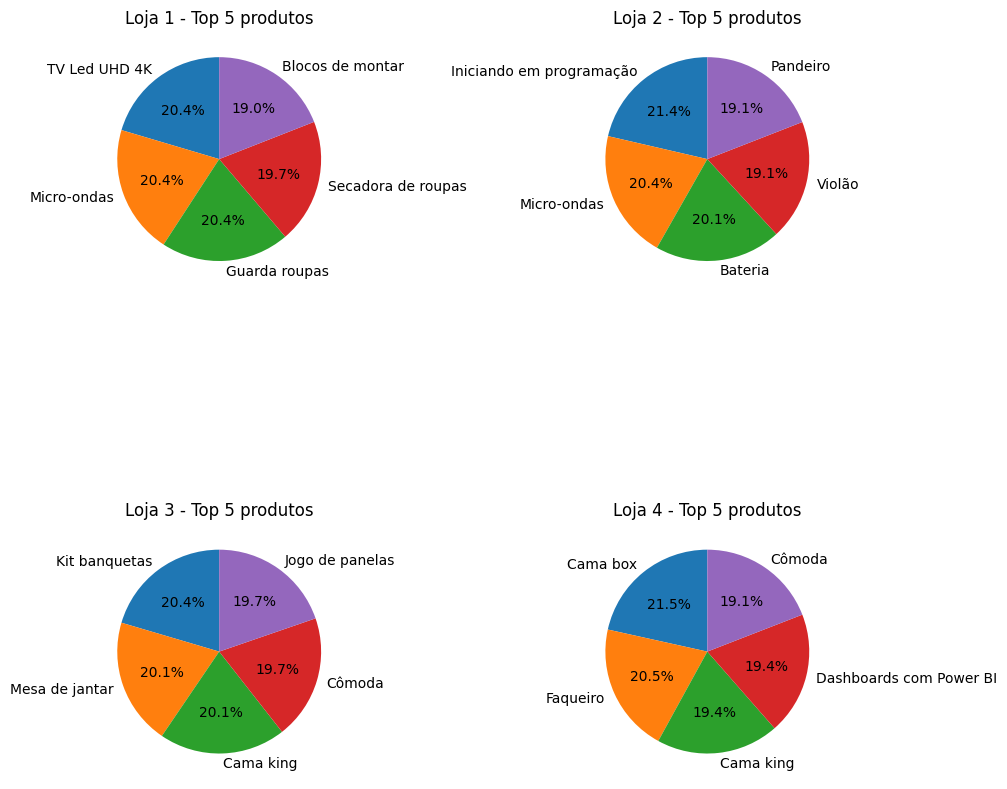

In [45]:
plt.figure(figsize=(10,10))

# Loja 1
plt.subplot(2,2,1)
plt.pie(
    mais_vendidos_loja['quantidade_vendas'],
    labels=mais_vendidos_loja['Produto'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Loja 1 - Top 5 produtos')

# Loja 2
plt.subplot(2,2,2)
plt.pie(
    mais_vendidos_loja2['quantidade_vendas'],
    labels=mais_vendidos_loja2['Produto'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Loja 2 - Top 5 produtos')

# Loja 3
plt.subplot(2,2,3)
plt.pie(
    mais_vendidos_loja3['quantidade_vendas'],
    labels=mais_vendidos_loja3['Produto'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Loja 3 - Top 5 produtos')

# Loja 4
plt.subplot(2,2,4)
plt.pie(
    mais_vendidos_loja4['quantidade_vendas'],
    labels=mais_vendidos_loja4['Produto'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Loja 4 - Top 5 produtos')

plt.tight_layout()
plt.show()

## Gráfico 5: Avaliações dos clientes


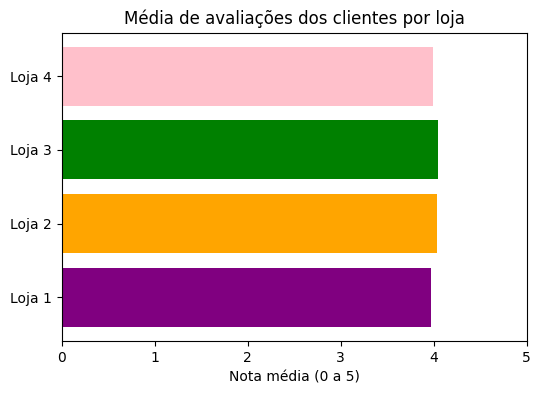

In [46]:
avaliacoes = [
    loja['Avaliação da compra'].mean(),
    loja2['Avaliação da compra'].mean(),
    loja3['Avaliação da compra'].mean(),
    loja4['Avaliação da compra'].mean()
]

plt.figure(figsize=(6,4))
plt.barh(lojas, avaliacoes, color=['purple','orange','green','pink'])
plt.title('Média de avaliações dos clientes por loja')
plt.xlabel('Nota média (0 a 5)')
plt.xlim(0,5)
plt.show()


# 7. Relatório

## 7.1 Introdução

O objetivo desta análise foi avaliar o desempenho das quatro lojas da AluraStore Brasil, a fim de auxiliar o Senhor João a decidir qual loja deve ser vendida.

Foram avaliados os seguintes indicadores:  
* faturamento total;
* quantidade de vendas;
* frete médio;
* categorias de produtos mais e menos vendidas;
* produtos de destaque;
* médias de avaliação dos clientes.

Os dados foram explorados com o uso da biblioteca Pandas e visualizados com Matplotlib, permitindo identificar de forma clara os pontos fortes e fracos de cada loja.

## 7.2 Desenvolvimento

A análise mostrou que a **Loja 1** possui o maior faturamento `R$1.534.509,12`, mesmo com o frete mais caro e a menor avaliação média (3,98).

A **Loja 3** tem o melhor equilíbrio geral, com boa avaliação dos clientes (4,05) e frete acessível `R$ 33,07`.

A **Loja 2** também apresenta bons resultados, ficando logo atrás em faturamento e avaliações.

Já a **Loja 4**, embora tenha o frete mais barato `R$ 31,28`, teve o menor faturamento `R$ 1.384.497,58 `e, ligeiramente, o menor número de vendas, além de não se destacar em produtos ou categorias.\

## 7.3 Conclusão

Com base nos resultados, a **Loja 4** deve ser vendida.
Ela apresenta o pior desempenho financeiro entre as quatro, mesmo com custos de frete menores.

As **lojas 1, 2 e 3** devem ser mantidas, especialmente a **Loja 3**, que reúne bons lucros, satisfação dos clientes e eficiência logística, sendo a operação mais equilibrada da AluraStore Brasil.